In [1]:
from PatriciaDatabase import PatriciaDatabase
from PatriciaTrie import PatriciaTrie
from PatriciaDatabaseTest import test

Arguments to connectiong database

In [2]:
args = {
    'DB_NAME': "darkhannurlybay", 
    'DB_USER': "darkhannurlybay",
    'DB_PASSWORD': "",
    'DB_HOST': "localhost",
    'DB_PORT': "5432",
    'verbose': False
}

Run unit tests

In [3]:
test(args)


Seems like good!


Creating some users in our system

In [4]:
user = {
    'Alice': '000010',
    'Bob': '010100',
    'Sally': '111111'
}

['node_id', 'parent_id', 'balance', 'hash', 'type']
(2, 1, 100, 'f53bde1660418aeeb9a6065070c6e6333dfd9a92dfd87678fbdccb2cbdc711e7', 'leaf')
(1, 3, 100, '2f10bb8d7401f8a189d20f96825c2317da3f680150aa0ce2d1c99924e848eac4', 'user')
(5, 4, 50, 'a79d4b5c455492bcce16a018d44191a17111cf02b1a1569215215c6759ba5c2a', 'leaf')
(4, 3, 50, '9d5fb89c58ae421060477568ba48b97d7ac71fc1ed40b9bced800b7051a187aa', 'user')
(3, 0, 0, '04a03f1ccc23d843f8ea893fc2c3efb818645c8b38f7043fa78daac1968db33e', 'before')
(0, None, 0, '8c64d4a2cb24a7fe061e412fa564a7a50296f4cd17daff482c3f1e88b729f0e6', 'root')


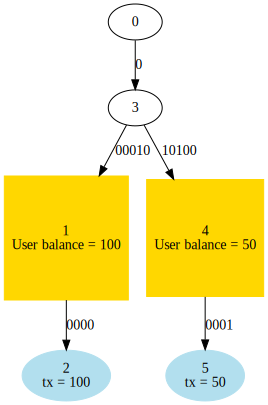

In [5]:
db = PatriciaDatabase(**args)
db.delete_tables()
db.create_tables()

t = PatriciaTrie(db, simple_hash=False)

t.create(user['Alice'], 100, '0000')
t.create(user['Bob'], 50, '0001')

db.print_column_name('PatriciaNode');
for row in t.db.show_table('PatriciaNode'):
    print(row)
    
t.draw()

In [6]:
assert t.get_balance(user['Alice']) == 100
assert t.get_balance(user['Bob']) == 50

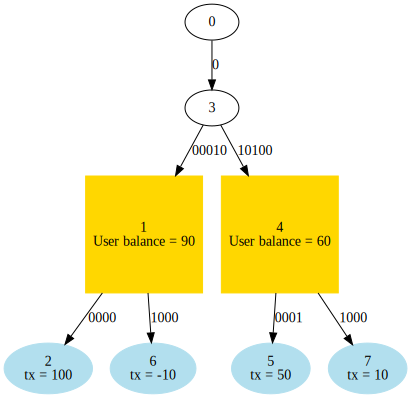

In [7]:
t.spend(user['Alice'], user['Bob'], 10, '1000')
assert t.get_balance(user['Alice']) == 90
assert t.get_balance(user['Bob']) == 60
t.draw()

In [8]:
db.close_session()

In [9]:
db = PatriciaDatabase(**args)
t = PatriciaTrie(db, simple_hash=False)

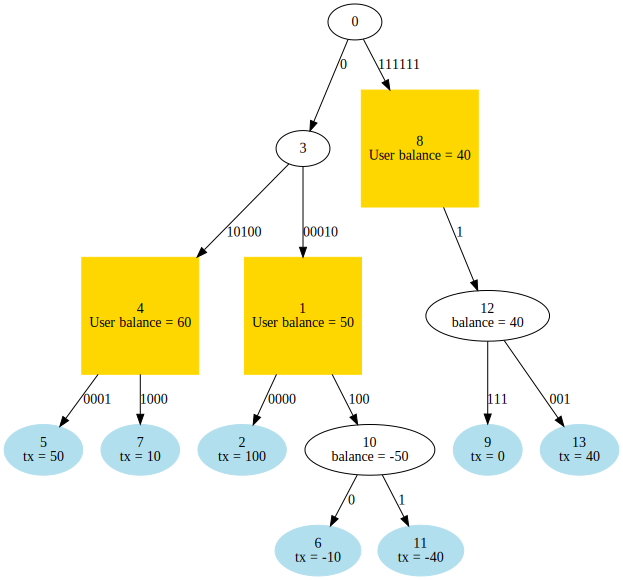

In [10]:
t.create(user['Sally'], 0, '1111')
t.spend(user['Alice'], user['Sally'], 40, '1001')
assert t.get_balance(user['Alice']) == 50
assert t.get_balance(user['Sally']) == 40
t.draw()

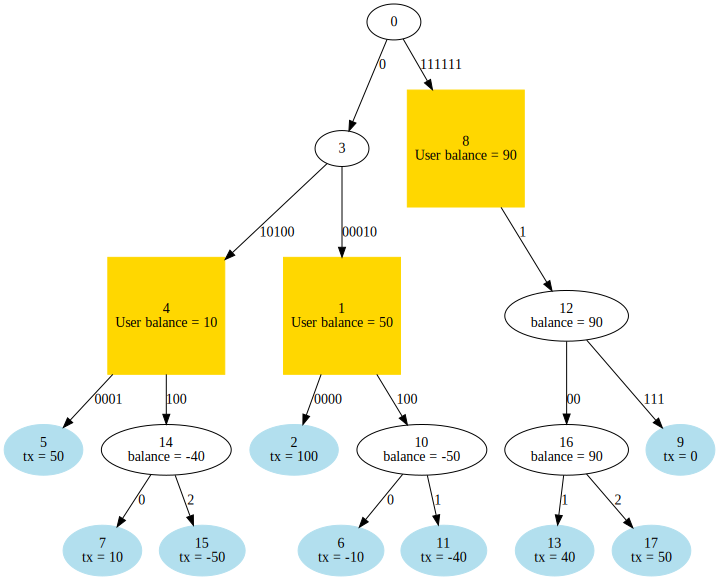

In [11]:
t.spend(user['Bob'], user['Sally'], 50, '1002')
t.get_balance(user['Bob'])
assert t.get_balance(user['Bob']) == 10
assert t.get_balance(user['Sally']) == 90
t.draw()

In [12]:
db.close_session()